GAME THEORY

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import colormaps as cm
from matplotlib import rc
rc('text', usetex = True)
import pandas as pd
#from numba import jit
import time
from pathlib import Path
#import fitz

Prueba github


In [52]:
#Definimos la función idx, la cual nos ayudará con las condiciones de contorno periódicas.

def idx(x):
    return x%N
#Definimos el juego del dilema del prisionero entre dos vecinos. Recibe como parámetros la matriz de estrategias (s) y la de payoffs (p)
#y las dos posiciones de los jugadores que se enfrentan, [i][j] y [m][n]. La i, j se 
#refieren al jugador en el que nos estamos fijando. Notar que cooperar se entiende como s[i][j] = 0 y deflectar como s[i][j] = 1.

def game(s, p, i, j, m, n):
    payoff = 0.0
    if s[i][j] == 0 and s[m][n] == 0:
        p[i][j] = p[i][j] + 1
        p[m][n] = p[m][n] + 1
#    if s[i][j] == 1 and s[m][n] == 1:
#        p[i][j] = p[i][j] + 0
#        p[m][n] = p[m][n] + 0
    if s[i][j] == 0 and s[m][n] == 1:
#        p[i][j] = p[i][j] + 0
        p[m][n] = p[m][n] + b
    if s[i][j] == 1 and s[m][n] == 0:
        p[i][j] = p[i][j] + b
#        p[m][n] = p[m][n] + 0


def diagonalgame(s, p, i, j, m, n):
    payoff = 0.0
    if s[i][j] == 0 and s[m][n] == 0:
        p[i][j] = p[i][j] + 1
#    if s[i][j] == 1 and s[m][n] == 1
#        p[i][j] = p[i][j] + 0
#    if s[i][j] == 0 and s[m][n] == 1:
#        p[i][j] = p[i][j] + 0
    if s[i][j] == 1 and s[m][n] == 0:
        p[i][j] = p[i][j] + b

#Función para actualizar la ganancia de un jugador dado tras una ronda (jugar con sus cuatro vecinos). Para cada par de jugadores solo se
#tiene que jugar una vez, pues sabiendo ambas estrategias se les puede asignar una ganancia (payoff) automáticamente a ambos. Hemos de hacer
#un bucle para interaccionar en cada fila entre sí primero y luego cada columna entre sí (dos llamadas a game()).

def play(s, p):
    for i in range (0,N):
        for j in range (0,N):
            game(s, p, i, j, idx(i), idx(j+1))
            game(s, p, j, i, idx(j+1), idx(i))
    #Cada jugador juega consigo mismo también, ya que en algunos casos se puede obtener p = +1 (si el jugador es cooperador)
            diagonalgame(s, p, i, j, i, j)
    #Además hay que computar las interacciones con los vecinos diagonales, que no son tan triviales. Por ahora no se me ocurre una manera
    #para que solo haya que computar una interacción y no la opuesta como en el caso de los que están a los lados o encima y debajo.
            diagonalgame(s, p, i, j, idx(i+1), idx(j+1))
            diagonalgame(s, p, i, j, idx(i-1), idx(j-1))
            diagonalgame(s, p, i, j, idx(i+1), idx(j-1))
            diagonalgame(s, p, i, j, idx(i-1), idx(j+1))

#Definimos una función que compara los resultados (ganancias) con los k = 8 vecinos de cada jugador y además actualiza la estrategia para
#imitar la de aquel que más puntuación ha obtenido. "Recorremos" el elemento s[i][j] en sentido horario empezando arriba a la izquierda. 
#Darse cuenta que no podemos ir cambiando uno a uno, pues eso afectaría al cambio de los posteriores. Hemos de determinar para todos los
#jugadores a quién van a imitar primero, y luego cambiarlos todos de golpe. PREGUNTAR SI CUANDO EL PROPIO JUGADOR TIENE MEJOR RESULTADO
#QUE SUS VECINOS SI NOS QUEDAMOS CON LA MISMA ESTRATEGIA O AUN ASÍ COPIAMOS AL MEJOR DE NUESTROS VECINOS.

def update(s, p):
    for i in range (0, N):
        for j in range (0, N):
            choose = np.array([s[idx(i)][idx(j)], s[idx(i-1)][idx(j-1)], s[idx(i-1)][idx(j)], s[idx(i-1)][idx(j+1)], s[idx(i)][idx(j+1)],
                               s[idx(i+1)][idx(j+1)], s[idx(i+1)][idx(j)], s[idx(i+1)][idx(j-1)], s[idx(i)][(j-1)]])
            score  = np.array([p[idx(i)][idx(j)], p[idx(i-1)][idx(j-1)], p[idx(i-1)][idx(j)], p[idx(i-1)][idx(j+1)], p[idx(i)][idx(j+1)],
                               p[idx(i+1)][idx(j+1)], p[idx(i+1)][idx(j)], p[idx(i+1)][idx(j-1)], p[idx(i)][(j-1)]])
            aux[i][j] = choose[np.argmax(score)]

    for i in range (0, N):
        for j in range (0, N):
            s[i][j] = np.copy(aux[i][j])		

#Creamos ahora una función para determinar el color de cada jugador, teniendo en cuenta que si pasa de C a C es azul, si pasa de D a D es 
#rojo, si pasa de C a D es amarillo y si pasa de D a C es verde
def color(s, aux2):
    for i in range (0, N):
        for j in range (0, N):
            if aux2[i][j] == 0 and s[i][j] == 1:
                s[i][j] = 0.25
            if aux2[i][j] == 1 and s[i][j] == 0:
                s[i][j] = 0.75

Compiling time: 178.90445709228516 seconds (= 2.981740951538086 minutes)


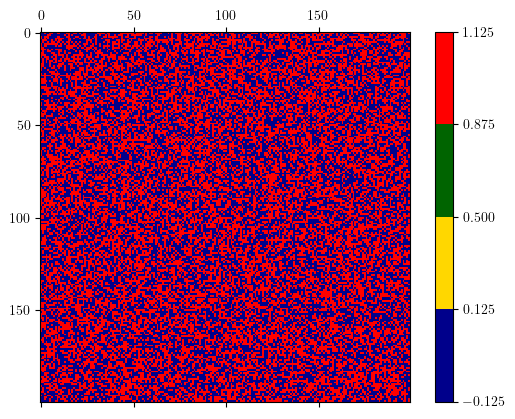

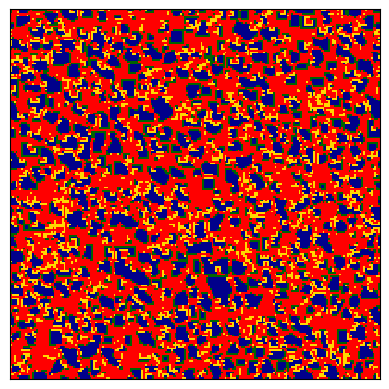

In [61]:
colors = ['darkblue', 'gold', 'darkgreen', 'red']
cmap = ListedColormap(colors)
boundaries = [-0.125, 0.125, 0.5, 0.875, 1.125]
norm = BoundaryNorm(boundaries, len(colors))
#Número de jugadores de la red.
N = 200
#Valor del parámetro b.
b = 1.80
#Definimos el número de rondas que se van a jugar.
rounds = 200
#Inicialmente se define la matriz de estrategias s como aleatoria, y la de ganancias p se inicia a 0 para que la ganancia sea nula al inicio
s = np.zeros((N,N))
p = np.zeros((N,N))
aux = np.zeros((N,N))
aux2 = np.zeros((N,N))

for i in range (0,N):
    for j in range (0,N):
        r = np.random.random()
        if r <= 0.5:
            s[i][j] = 0
        if r >= 0.5:
            s[i][j] = 1


#Igualamos la matriz auxiliar a la de estrategias 
aux2 = np.copy(s)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
cax1 = ax1.matshow(s, cmap=cmap, norm=norm)
fig1.colorbar(cax1)
#Bucle principal del programa. En cada ronda la matriz de ganancias (payoffs) p se debe inicializar a cero, y las estrategias se deben 
#actualizar para seguir la imitación incondicional (UI).
start = time.time()
#Creamos un array para contar el número de cooperadores en la red en cada paso. Para ello, como los deflectores son 1, sumamos todos los
#valores del array (ya que es de 0s y 1s) y se lo restamos a NxN para ver el número de cooperadores en la red. Dividimos entre NxN para
#hallar la fracción ρ(b).
n_c = np.zeros(rounds + 1)
n_c[0] = (N*N - np.sum(s))/(N*N)

for k in range (0, rounds):
    p = np.zeros((N,N))
    play(s,p)
    update(s,p)
    n_c[k+1] = (N*N - np.sum(s))/(N*N)
    #Importante, si no creamos un nuevo puntero en la memoria para aux2 no funciona, ya que al cambiar s en el paso anterior aux2 ha 
    #cambiado también!
    #No llamamos a aux2 en la última iteración para poder comparar s en (t final) y s en (t final -1) y aplicar el código de colores al
    #final del programa como se ve en [***]
    if k != rounds-1:
        aux2 = np.copy(s)


end = time.time()
print(f'Compiling time: {end - start} seconds (= {(end - start)/60} minutes)')

#Guardamos en un .txt los valores de s
xaxis = np.arange(0, rounds + 1)
savearray = np.stack([xaxis, n_c], axis=1)
np.savetxt('b180.txt', savearray, delimiter = '\t')

fig2 = plt.figure()
#[***]
color(s, aux2)
ax2 = fig2.add_subplot(111)
cax2 = ax2.matshow(s, cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])
#fig2.colorbar(cax2)
plt.savefig('matriz_final.pdf')

#Azul se refiere a 0 (cooperar) y rojo se refiere a 1 (deflectar). 1/2 es pasar de C a D y -1/2 es pasar de D a C.

In [ ]:
#"Glider"
"""
s = np.ones((N,N))
s[int(N/2)][int(N/2)] = 0
s[int(N/2-1)][int(N/2)] = 0
s[int(N/2-2)][int(N/2)] = 0
s[int(N/2-3)][int(N/2)] = 0
s[int(N/2)][int(N/2-1)] = 0
s[int(N/2-1)][int(N/2-1)] = 0
s[int(N/2-2)][int(N/2-1)] = 0
s[int(N/2-3)][int(N/2-1)] = 0
s[int(N/2-3)][int(N/2-2)] = 0
s[int(N/2-3)][int(N/2-3)] = 0
"""

<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
/var/folders/1y/f1dfzl6j3r1173bj2qj8vr9m0000gn/T/ipykernel_54891/2005280779.py:47: SyntaxWarning: invalid escape sequence '\l'
  f'$x = 12\log(2)-8$',


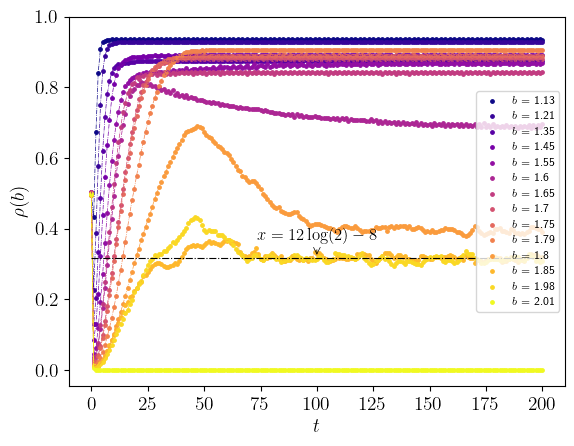

In [66]:
#En esta celda queremos caracterizar la densidad de cooperadores en la red dependiendo del parámetro libre b.
#Para ello queremos correr el programa con varios valores de b. Para cada valor de b tendremos un archivo en
#el que la primera columna contiene el paso (de 0 a rounds) y la seguna columna el número de cooperadores en
#la red

data1 = pd.read_csv('b113.txt', sep = '\t', header = None)
data2 = pd.read_csv('b121.txt', sep = '\t', header = None)
data3 = pd.read_csv('b135.txt', sep = '\t', header = None)
data4 = pd.read_csv('b145.txt', sep = '\t', header = None)
data5 = pd.read_csv('b155.txt', sep = '\t', header = None)
data6 = pd.read_csv('b160.txt', sep = '\t', header = None)
data7 = pd.read_csv('b165.txt', sep = '\t', header = None)
data8 = pd.read_csv('b170.txt', sep = '\t', header = None)
data9 = pd.read_csv('b175.txt', sep = '\t', header = None)
data10 = pd.read_csv('b179.txt', sep = '\t', header = None)
data11 = pd.read_csv('b180.txt', sep = '\t', header = None)
data12 = pd.read_csv('b185.txt', sep = '\t', header = None)
data13 = pd.read_csv('b198.txt', sep = '\t', header = None)
data14 = pd.read_csv('b201.txt', sep = '\t', header = None)


x = np.array(data1.iloc[:,0])

y1 = np.array(data1.iloc[:,1])
y2 = np.array(data2.iloc[:,1])
y3 = np.array(data3.iloc[:,1])
y4 = np.array(data4.iloc[:,1])
y5 = np.array(data5.iloc[:,1])
y6 = np.array(data6.iloc[:,1])
y7 = np.array(data7.iloc[:,1])
y8 = np.array(data8.iloc[:,1])
y9 = np.array(data9.iloc[:,1])
y10 = np.array(data10.iloc[:,1])
y11 = np.array(data11.iloc[:,1])
y12 = np.array(data12.iloc[:,1])
y13 = np.array(data13.iloc[:,1])
y14 = np.array(data14.iloc[:,1])

y = np.array([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14])
bvalue = np.array([1.13, 1.21, 1.35, 1.45, 1.55, 1.60, 1.65, 1.70, 1.75, 1.79, 1.80, 1.85, 1.98, 2.01])
#Probar también con "coolwarm" y elegir color
cmap = cm.get_cmap('plasma')
colors = [cmap(i /(len(bvalue)-1)) for i in range(len(bvalue))]
const = np.ones(len(x))*(12*np.log(2)-8)
const_val = 12 * np.log(2) - 8

plt.annotate(
    f'$x = 12\log(2)-8$',       
    xy=(x[len(x)//2], const_val),        
    xytext=(x[len(x)//2], const_val + 0.05),  
    arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=0.5),
    fontsize=12,
    ha='center'
)

for i in range (0, len(y)):
    plt.scatter(x, y[i], color = colors[i], s = 6, label = rf'$b$ = {bvalue[i]}')
    plt.plot(x, y[i], '-.', color = colors[i], linewidth = 0.5)

plt.plot(x, const, '-.', color = 'black', linewidth = 0.8)

plt.legend(fontsize = 8, loc = 'right')
plt.xlabel(r'$t$', fontsize=14)
plt.xticks(fontsize = 14)
plt.ylabel(r'$\rho(b)$', fontsize=14)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = 14)
plt.savefig('rho(b).pdf')
plt.show()

THIRD TASK; RED DE ERDÖS RENJI

GIF generado exitosamente: evolucion_red.gif


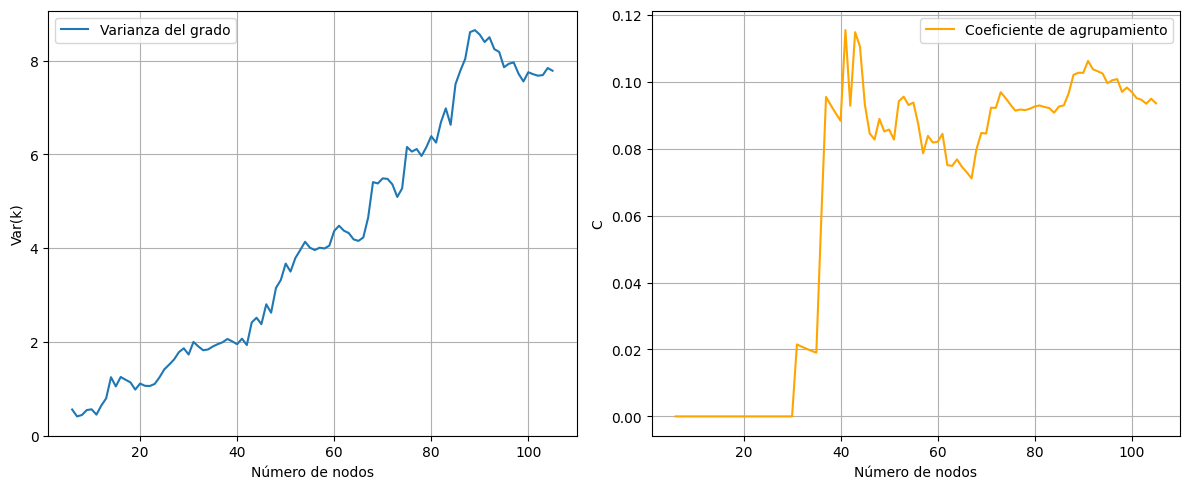

<Figure size 600x600 with 0 Axes>

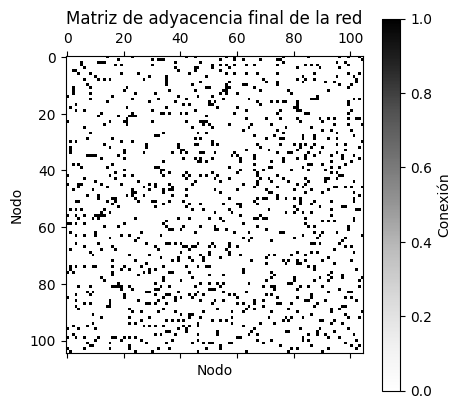

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation

#Datos iniciales
N0 = 5 #Nodos iniciales
p = 0.1 #Hacer un barrido con distintos p
T = 100 #Numero de transiciones temporales
gif_filename = 'evolucion_red.gif'

#Creo un array de zeros para los valores de la varianza, el coeficiente de agrupamiento y el numero de nodos
nnodos = np.zeros(T)
vark = np.zeros(T)
C = np.zeros(T)

#Creo la red de Erdös-Renji inicial
G = nx.erdos_renyi_graph(N0, p)
graphs = [G.copy()] #Almacenar imagen en cada paso


#Evolucion temporal
for t in range(T):
    nuevonodo = len(G.nodes)
    G.add_node(nuevonodo)
    
    #Conectamos el nuevo nodo con probabilidad p
    for nodoexistente in list(G.nodes)[:-1]: #Partimos del ultimo nodo
        if np.random.rand() < p:
            G.add_edge(nuevonodo, nodoexistente)
            
    #Calculo las propiedades topologicas que me hacen falta
    grados = np.array([deg for _, deg in G.degree()])
    vark_actual = np.var(grados)
    C_actual = nx.average_clustering(G)
    
    #Guardo los datos en los arrays
    vark[t] = vark_actual
    nnodos[t] = len(G.nodes)
    C[t] = C_actual
    
    graphs.append(G.copy()) #Añadimos al graphs la nueva G
    
    
# Layout fijo para mantener posiciones constantes
pos = nx.spring_layout(graphs[-1], seed=42)

# Configurar figura
fig, ax = plt.subplots(figsize=(6, 6))

def update(i):
    ax.clear()
    G_step = graphs[i]
    nx.draw(
        G_step, pos, ax=ax,
        node_size=50, node_color='skyblue',
        edge_color='gray', with_labels=False
    )
    ax.set_title(f"Paso {i}", fontsize=14)
    ax.set_axis_off()

# Crear animación
ani = animation.FuncAnimation(fig, update, frames=len(graphs), interval=400)

# Guardar como GIF
ani.save(gif_filename, writer='pillow')

plt.close()
print(f"GIF generado exitosamente: {gif_filename}")
# Graficar evolución temporal
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(nnodos, vark, label='Varianza del grado')
plt.xlabel("Número de nodos")
plt.ylabel("Var(k)")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(nnodos, C, label='Coeficiente de agrupamiento', color='orange')
plt.xlabel("Número de nodos")
plt.ylabel("C")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Visualizar la matriz de adyacencia final
A = nx.to_numpy_array(G)

plt.figure(figsize=(6,6))
plt.matshow(A, cmap='Greys')
plt.title("Matriz de adyacencia final de la red")
plt.xlabel("Nodo")
plt.ylabel("Nodo")
plt.colorbar(label="Conexión")
plt.show()